In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
sys.path.insert(0, r'../src')
from function_cache import *

In [3]:
T_contracts_sequence = pd.read_csv('../data/processed/roll_period/T_contracts_sequence.csv', index_col=0)
TF_contracts_sequence = pd.read_csv('../data/processed/roll_period/TF_contracts_sequence.csv', index_col=0)

In [4]:
# start and end date of roll period
T_roll_period = pd.read_csv(
    "../data/processed/roll_period/T_roll_period.csv", index_col="contract"
).astype("datetime64[ns]")
TF_roll_period = pd.read_csv(
    "../data/processed/roll_period/TF_roll_period.csv", index_col="contract"
).astype("datetime64[ns]")

In [5]:
T_0min = pd.read_csv('../data/processed/price_before_close/T_0min.csv', index_col='Trading_Day', parse_dates=True)
TF_0min = pd.read_csv('../data/processed/price_before_close/TF_0min.csv', index_col='Trading_Day', parse_dates=True)
T_5min = pd.read_csv('../data/processed/price_before_close/T_5min.csv', index_col='Trading_Day', parse_dates=True)
TF_5min = pd.read_csv('../data/processed/price_before_close/TF_5min.csv', index_col='Trading_Day', parse_dates=True)
T_10min = pd.read_csv('../data/processed/price_before_close/T_10min.csv', index_col='Trading_Day', parse_dates=True)
TF_10min = pd.read_csv('../data/processed/price_before_close/TF_10min.csv', index_col='Trading_Day', parse_dates=True)
T_15min = pd.read_csv('../data/processed/price_before_close/T_15min.csv', index_col='Trading_Day', parse_dates=True)
TF_15min = pd.read_csv('../data/processed/price_before_close/TF_15min.csv', index_col='Trading_Day', parse_dates=True)

In [6]:
T_features = pd.read_csv('../data/processed/candidate_features/T_features.csv', index_col=0)
TF_features = pd.read_csv('../data/processed/candidate_features/TF_features.csv', index_col=0)

In [7]:
T_spread_change = pd.read_csv('../data/processed/different_ys/T_spread_change.csv', index_col=0)
TF_spread_change = pd.read_csv('../data/processed/different_ys/TF_spread_change.csv', index_col=0)

In [8]:
TF_spread_change.head()

,0min_0min,0min_5min,0min_10min,0min_15min,5min_0min,5min_5min,5min_10min,5min_15min,10min_0min,10min_5min,10min_10min,10min_15min,15min_0min,15min_5min,15min_10min,15min_15min,contract_code
contract,,,,,,,,,,,,,,,,,
TF1312,-0.032,-0.048,-0.034,-0.036,-0.052,-0.068,-0.054,-0.056,-0.050,-0.066,-0.052,-0.054,-0.016,-0.032,-0.018,-0.020,0
TF1403,-0.218,-0.204,-0.202,-0.202,-0.236,-0.222,-0.220,-0.220,-0.238,-0.224,-0.222,-0.222,-0.218,-0.204,-0.202,-0.202,1
TF1406,-0.156,-0.170,-0.206,-0.198,-0.144,-0.158,-0.194,-0.186,-0.150,-0.164,-0.200,-0.192,-0.146,-0.160,-0.196,-0.188,2
TF1409,-0.066,-0.072,-0.090,-0.074,-0.072,-0.078,-0.096,-0.080,-0.088,-0.094,-0.112,-0.096,-0.074,-0.080,-0.098,-0.082,3
TF1412,-0.046,-0.028,-0.016,-0.012,-0.064,-0.046,-0.034,-0.030,-0.044,-0.026,-0.014,-0.010,-0.084,-0.066,-0.054,-0.050,4


In [9]:
X = TF_features.values
y = TF_spread_change['0min_0min'].values

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
svr = SVR(kernel='linear')
svr.fit(X, y)
svr.score(X, y)

0.8378287176599416

In [12]:
svr.coef_

array([[-0.0495476 ,  0.00198843,  0.027162  ,  0.03798635,  0.02676101,
        -0.05677861, -0.06166706,  0.09577568,  0.10065801, -0.04509235,
        -0.00152862, -0.00652476,  0.05492108,  0.01911286, -0.02176722,
        -0.06709161,  0.00821543, -0.01663285, -0.00175677,  0.02565817,
         0.0645882 ,  0.01458054,  0.03042849,  0.01010064, -0.01163614,
         0.03369352,  0.03518284, -0.00702107]])

In [13]:
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [14]:
coef_sr = pd.Series(svr.coef_[0], index=T_features.columns)
coef_sr

5d_spread_change                 -0.049548
10d_spread_change                 0.001988
15d_spread_change                 0.027162
20d_spread_change                 0.037986
10d_act_price_exp_mva             0.026761
-1d_corr_act_price_def_OI        -0.056779
-1d_corr_def_price_def_OI        -0.061667
10d_spread_std_divided_by_std     0.095776
10d_current_price                 0.100658
1d_z_diff_act_price_def_price    -0.045092
-1d_corr_act_price_def_volume    -0.001529
-1d_corr_def_price_def_volume    -0.006525
10d_current_spread                0.054921
-1d_std                           0.019113
-1d_corr_act_price_def_price     -0.021767
-1d_corr_act_OI_def_volume       -0.067092
-1d_corr_act_OI_def_OI            0.008215
-1d_corr_def_volume_def_OI       -0.016633
-1d_corr_def_OI_spread           -0.001757
-1d_corr_def_volume_spread        0.025658
1d_z_diff_act_price_def_OI        0.064588
-1d_corr_act_volume_def_volume    0.014581
-1d_corr_act_volume_def_OI        0.030428
-1d_corr_ac

In [15]:
plt.rcParams['figure.figsize'] = [25, 15]

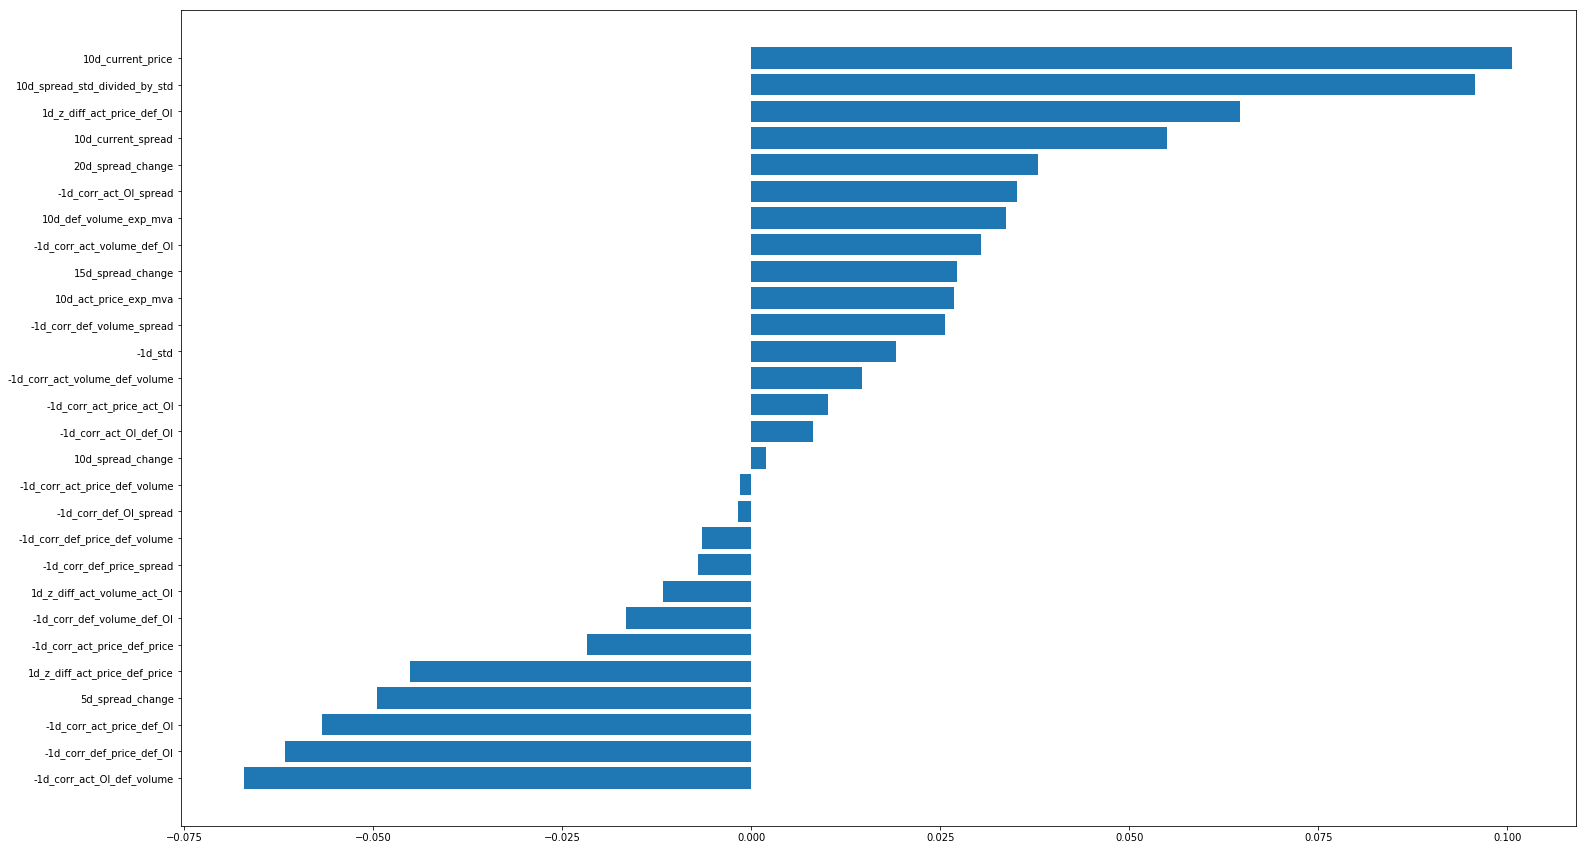

In [16]:
f_importances(svr.coef_[0], T_features.columns)

In [17]:
y_pred = svr.predict(X)

In [35]:
TF_spread_change['0min_0min']

contract
TF1312   -0.032
TF1403   -0.218
TF1406   -0.156
TF1409   -0.066
TF1412   -0.046
TF1503   -0.074
TF1506   -0.010
TF1509    0.160
TF1512    0.305
TF1603    0.155
TF1606    0.025
TF1609   -0.140
TF1612    0.310
TF1703    0.745
TF1706   -0.515
TF1709    0.050
TF1712   -0.035
TF1803    0.130
TF1806   -0.170
TF1809    0.015
TF1812    0.030
TF1903   -0.020
TF1906    0.095
Name: 0min_0min, dtype: float64

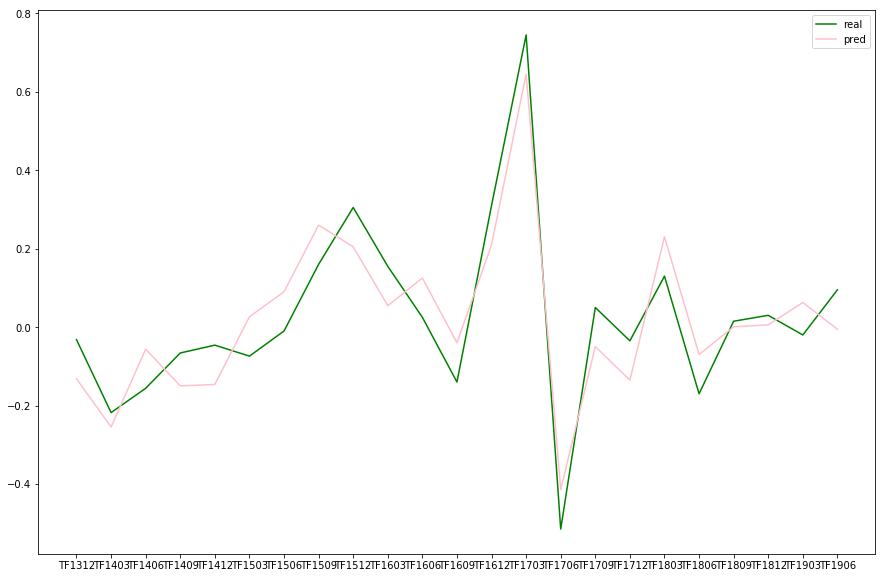

In [47]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(TF_spread_change['0min_0min'].index, TF_spread_change['0min_0min'].values, c='g', label='real')
plt.plot(TF_spread_change['0min_0min'].index, y_pred, c='pink', label='pred')
plt.legend(loc='upper right')

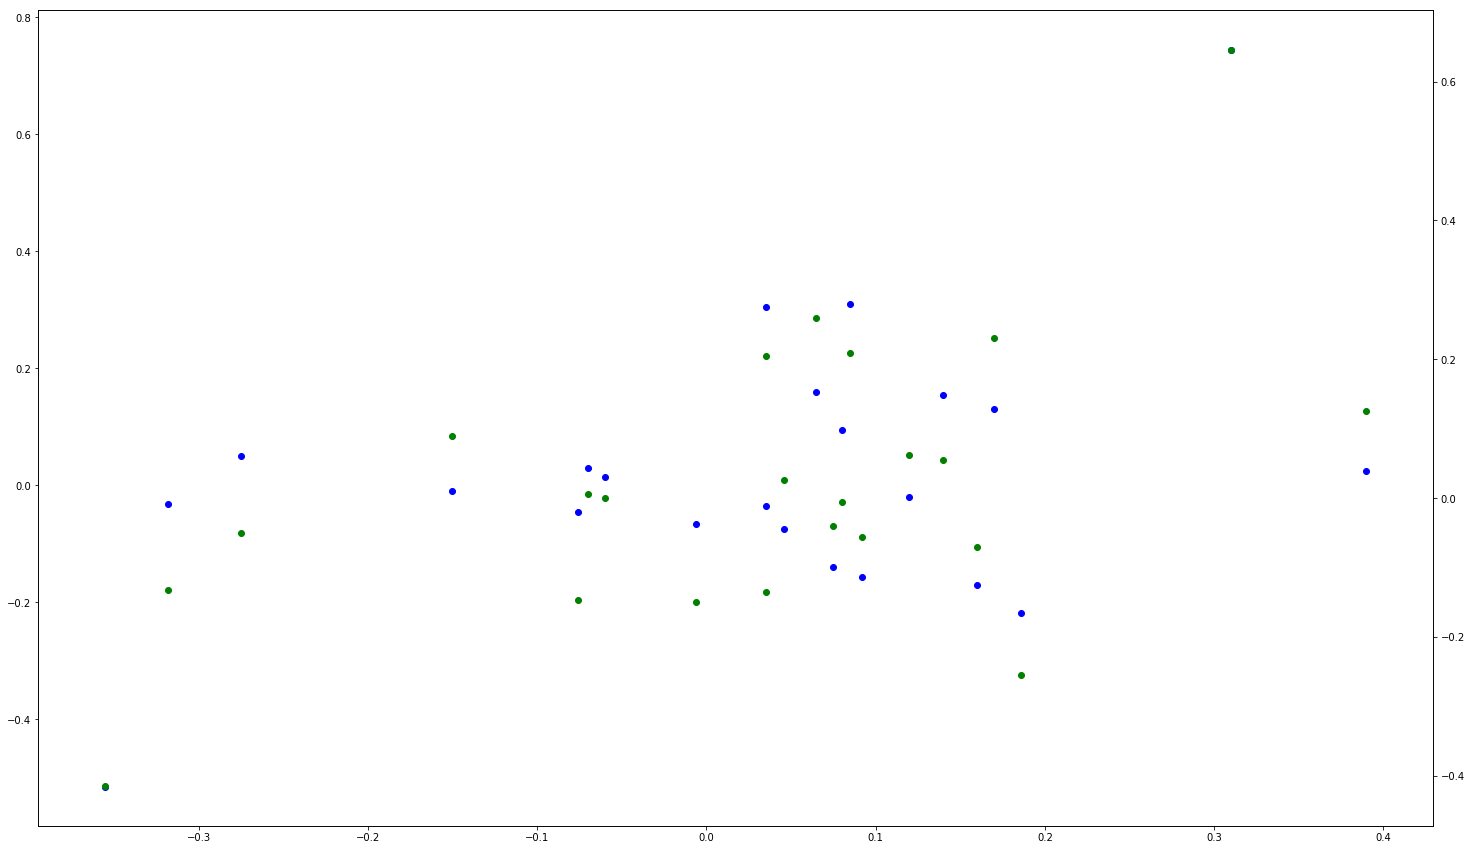

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(TF_features.iloc[:, 2].values, y, c='b')
ax2 = plt.twinx(ax)
ax2.scatter(TF_features.iloc[:, 2].values, y_pred, c='g')
plt.show()